In [2]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

<b><h3>Data and Sampling Distributions</h3></b>

The proliferation of data of varying quality and relevance reinforces the need for sampling as a tool to work efficiently with a variety of data and to minimize bias. Even in a big data project, predictive models are typically developed and piloted with samples. Samples are also used in tests of various sorts (eg comparing the effect of web page designs on clicks).

A population, in statistics is assumed to follow an underlying but unknown distribution. All that is available is the sample data and its empirical distribution. To get from the population to the sample, a sampling procedure is used. 

Sometimes data is generated from a physical process that can be modeled. The simplest example is flipping a coin: this follows a binomial distribution. Any real-life binomial situation (buy or don't by, fraud or no fraud, click or don't click) can be modeled effectively by a coin (with modified probability of landing heads, of course). In these cases, we can gain additional insight by using our understanding of the population.

<b><h3>Random Sampling and Sample Bias</h3></b>

A sample is a subset of data from a larger data set; statisticians call this larger data set the population. A population in statistics is not the same thing as in biology - it is a large, defined (but sometimes theoretical or imaginary) set of data.

Random sampling is a process in which each available member of the population being sampled has an equal chance of being chosen for the sample at each draw. The sample that results is called a simple random sample. Sampling can be done with replacement, in which observations are put back in the population after each draw for possible future reselection. Or it can be done without replacement, in which case observations, once selected, are unavailable for future draws.

Data quality often matters more than data quantity when making an estimate or a model based on a sample. Data quality in data science involves completeness, consistency of format, cleanliness, and accuracy of individual data points. Statistics adds the notion of representativeness.

Sample bias is when the sample is different in some meaningful and nonrandom way from the larger population it was meant to represent. The term nonrandom is important - hardly any smaple, including random samples, will be exactly representative of the population. Sample bias occurs when the difference is meaningful, and it can be expected to continue for other samples drawn in the same way as the first.

<b><h4>Bias</h4></b>

Statistical bias refers to measurement or sampling errors that are systematic and produced by the sampling process. An important distinction should be made between errors due to random chance and errors due to bias. An unbiased process will produce error, but it is random and does not tend strongly in any direction. Bias comes in different forms, and may be observable or invisible. When a result does suggest bias (eg by reference to a benchmark or actual values), it is often an indicator that a statistical or machine learning model has been misspecified, or an important variable left out.

<b><h4>Random Selection</h4></b>

There are now a variety of methods to achieve representativeness, but at the heart of all of them lies random sampling. Random sampling is not always easy. Proper definition of an accessible population is key. Suppose we want to generate a representative profile of customers and we need to conduct a pilot customer survey. The survey needs to be representative but is labor intensive. 

First, we need to define who a custome is. We might select all customer records where purchase amount > 0. Do we include all past customers? Do we include refunds? Internal test purchases? Resellers? Both billing agent and customer? 

Next, we need to specify a sampling procedure. It might be "select 100 customers at random". When a sampling from a flow is involved (eg real-time customer transactions or web visitors), timing considerations may be important (eg a web visitior at 10 am on a weekday may be different from a web visitor at 10pm on a weekend).

In stratified sampling, the population is divided up into strata, and random samples are taken from each stratum. If political pollsters might seek to learn the electoral preferences of whites, blacks, hispanics, a simple random sample taken from the population would yield too few blacks and hispanics, so those strata could be overweighted in stratified sampling to yield equivalent sample sizes. 


<b><h4>Size versus Quality</h4></b>

Time and effort spent on random sampling not only reduces bias but also allows a greater attention to data exploration and data quality. For example, missing data and outliers may contain useful information. It might be prohibitively expensive to track down missing values or evaluate outliers in millions of records, but doing so in a samle of several thousand records may be feasible. Data plotting and manual inspection bog down if there is too much data.

So when are massive amounts of data needed? The classic scenario for the value for big data is when the data is not only big but sparse as well. Consider the search queries received by Google, where columns are terms, rows are individual search queries, and cell values are either 0 or 1, depending on whether a query contains a term (one-hot encoding the entire English Dictionary, stemming-yikes). The goalis to determine the best predicted search destination for a given query. There are over 150,000 words in the English language, and Google processes over one trillion queries per year. This yields a huge matrix, the vast majority of whose entries are "0".

This is a true big data problem - only when such enormous quantities of data are accumulated can effective search results be returned for most queries. And the more data accumulates, the better the results. For popular search terms, this is not a problem - effective data can be found fairly quickly for the handful of extremely popular topics trending at a particular time. The real value of modern search technology lies in the ability to return detailed and useful results for a huge variety of search queries, including those that occur less frequently.


<b><h4>Sample Mean Versus Population Mean</h4></b>

The symbol $\bar x$ is used to represent the mean of a sample from a population, where as $\mu$ is used to represent the mean of a population. Why make the distinction? Information about samples is observed, and information about large populations is often inferred from smaller samples. Statisticians like to keep the two things separate in the symbology.

<b><h3>Selection Bias</h3></b>

Selection bias refers to the practice of selectively choosing data - consciously or unconsciously - in a way that leads to a conclusion that is misleading or ephemeral. If you specify a hypothesis and conduct a well-designed experiment to test it, you can have high confidence in the conclusion. This is frequently not what occurs, however. Often, one looks at available data and tries to discern patterns. But are the patterns real? Or are they just the product of data snooping- that is, extensive hunting through the data until something interesting emerges? 

Since repeated view of large data sets is a key value proposition in data science, selection bias is something to worry about. A form of selection bias of particular concern to data scientists is the vast search effect. If you repeatedly run different models and ask different questions with a large data set, you are bound to find something interesting. But is the result you found truly something interesting, or is it the chance outlier?

We can guard against this by using a hold out set, and sometimes more than one hold out set, against which to validate performance. Target shuffling ( a permutation test, in essence)  can be used to test the validity of predictive associations that a data mining model suggests. Other typical forms of selection bias in statistics, include nonrandom sampling, cherry-picking data, selection of time intervals that accentuate a particular statistical effect, and stoppiing an experiment when the results look "interesting".

<b><h4>Regression to the Mean</h4></b>

Regression to the mean refers to a phenomenon involving successive measurements on a given variable: extreme observations tend to be followed by more central ones.  Attaching special focus and meaning to the extreme value can lead to a form of selection bias.

<b><h3>Sampling Distribution of a Statistic</h3></b>

The term sampling distribution of a statistic refers to the distribution of some sample statistic over many samples drawn from the same population. Much of classical statistics is concerned with making inferences from small samples to very large populations. Typically, a smaple is drawn with the goal of measuring something (with a sample statistic) or modeling something (with a statistical or machine learning model). Since our estimate or model is based on a sample, it might be in error; it might be different if we were to draw a different sample. We are therefore interested in how different it might be - a key concern is sampling variability. If we had lots of data, we could draw additional samples and observe the distribution of a sample statistic directly. Typically, we will calculate our estimate or model using as much data as is easily available, so the option of drawing additional samples from the population is not readily available. It is important to distinguish between the distribution of the individual data points, known as the data distribution, and the distribution of a sample statistic, known as the sampling distribution.

The distribution of a sample statistic such as the mean is likely to be more regular and bell-shaped than the distribution of the data itself. The larger the sample the statistic is based on, the more this is true. Also, the larger the sample, the narrower the distribution of the sample statistic. In the example below, we take three samples from a loan application income data set : a sample of 1000 values, a sample of 1000 means of 5 values, and a sample of 1000 means of 20 values. The we plot a histogram of each sample. The histogram of the individual data values is broadly spread out and skewed toward higher values, as is to be expected with income data. The histograms of 5 and 20 are increasingly compact and more bell-shaped.

In [3]:
# .squeeze() - parsed data only contains one column return a Series ( a Series doesnt have a column name)
loans_income = pd.read_csv('../data/loans_income.csv').squeeze('columns')
loans_income.head()

0     67000
1     52000
2    100000
3     78762
4     37041
Name: x, dtype: int64

In [4]:
sample_data = pd.DataFrame({
    'income' : loans_income.sample(1000),
    'type'   : 'Data'
}
)

sample_data.head()

,income,type
17980,45000,Data
9992,90000,Data
17178,47520,Data
5316,45000,Data
3317,170000,Data


In [5]:
sample_mean_05 = pd.DataFrame({
    'income' : [loans_income.sample(5).mean() for _  in range(1000)],
    'type'  : 'Mean of 5'
})
sample_mean_05.head()

,income,type
0,69035.0,Mean of 5
1,66000.0,Mean of 5
2,78600.0,Mean of 5
3,74200.0,Mean of 5
4,62400.0,Mean of 5


In [6]:
sample_mean_20 = pd.DataFrame({
    'income' : [loans_income.sample(20).mean() for _ in range(1000)],
    'type'   : 'Mean of 20',
})
sample_mean_20.head()

,income,type
0,61319.40,Mean of 20
1,88030.20,Mean of 20
2,69024.65,Mean of 20
3,60248.15,Mean of 20
4,56055.35,Mean of 20


In [7]:
results = pd.concat([sample_data, sample_mean_05, sample_mean_20]) # long form data
results

,income,type
17980,45000.00,Data
9992,90000.00,Data
17178,47520.00,Data
5316,45000.00,Data
3317,170000.00,Data
...,...,...
995,74670.20,Mean of 20
996,67580.75,Mean of 20
997,65162.00,Mean of 20
998,83770.00,Mean of 20


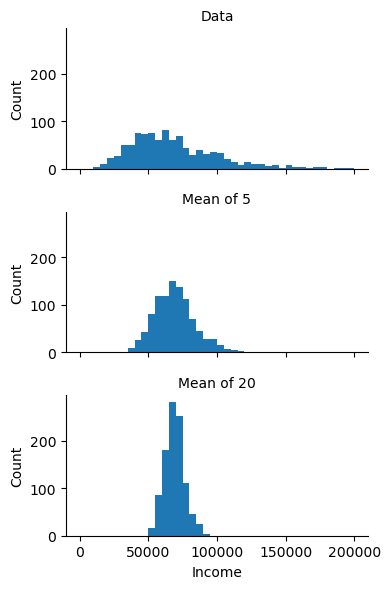

In [8]:
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0,200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')


plt.tight_layout()


<b><h4>Central Limit Theorem</h4></b>

The bell-shape of a sample statistic is a phenomenon termed the central limit theorem. It says that the means drawn from multiple samples will resemble the familiar bell-shaped normal curve, even if the source population is not normally distributed, provided the sample size is large enough and the departure of the data from normality is not too great. The central limit theorem allows normal-approximation formulas like the t-distribution to be used in calculating sampling distributions for inference - that is, confidence intervals and hypothesis tests. The central limit theorem underlies the machinery of hypothesis tests and confidence intervals.

<b><h4>Standard Error</h4></b>

The standard error is a single metric that sums up the variability in the sampling distribution for a statistic. The standard error can be estimated using a statistic based on the standard deviation s of the sample values, and the sample size n:

Standard error = SE = $\frac{s}{\sqrt n}$

As sample size increases, the standard error decreases. The relationship between standard error and sample size is sometimes referred to as the square root of n rule: to reduce the standard error by a factor of 2, the sample size must be decreased by a factor of 4.

The validity of the standard error formula arises from the central limit theorem. The approach to measuring standard error is as follows:
1. Collect a number of brand-new samples from the population.
2. For each new sample, calculate the statistic (e.g., mean).
3. Calculate the standard deviation of the statistics (e.g., mean); use this to calculate standard error

<b><h3>The BootStrap</h3></b>

One easy and effective way to estimate the sampling distribution of a statistic, or of model parameters, is to draw additional samples, with replacement, from the sample itself and recalculate the statistic or model for each sample. This procedure is called the bootstrap, and it does not necessarily involve any assumptions about the data or the sample statistic being normally distributed.

Conceptually, you can imagine the bootstrap as replicating the original sample thousands or millions of times so that you have a hypothetical population that embodies all the knowledge from your original sample (its just larger). 

In practice, it is not necessary to actually replicate the sample a huge number of times. We simply replace each observation after each draw; that is, we sample with replacement. In this way, we effectively create an infinite population in which the probability of an element being drawn remains unchanged from draw to draw. The algorithm for a bootstrap resampling of the mean, for a sample of size n, is as follows:
1. Draw a sample value, record it, and then <em>replace</em> it.
2. Repeat n times.
3. Record the mean of the n resampled values.
4. Repeat steps 1-3 R times.
5. Use R results to:
    - Calculate their standard deviation (this estimates sample mean standard error).
    - Produce a histogram or boxplot.
    - Find a confidence interval.

R, the number of iterations of the bootstrap, is set somewhat arbitarily. The more iterations you do, the more accurate the estimate of the standard error, or the confidence interval. The result from this procedure is a bootstrap set of sample statistics or estimated model parameters, which you can then examine to see how variable they are. Bootstrap can be implemented using the scikit-learn method resample().

Bootstrap Statistics:
153
original: 62000.0
bias: -264.52900000000227
std. error: 587.6147558224344


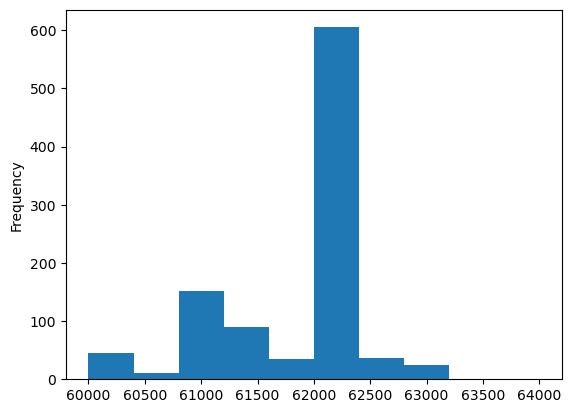

In [9]:
results = []

for nrepeat in range(1000):
    sample = resample(loans_income, n_samples=10000) # n_samples = (default first dim) with replacement
    results.append(sample.median()) # store statistic
results = pd.Series(results)
results.plot.hist()
print("Bootstrap Statistics:")
print(len(results.unique()))
print(f"original: {loans_income.median()}")
print(f"bias: {results.mean() - loans_income.median()}") # average bootstrap sample median versus actual median
print(f"std. error: {results.std()}")

The bootstrap can be used with multivariate data, where the rows are sampled as units. A model might then be run on the bootstrapped data, for example, to estimate the stability (variability) of model parameters, or to improve predictive power. With classification and regression trees (also called decision trees), running multiple trees on bootstrap samples and then averaging their predictions (or with classification, taking a majority vote) generally performs better than using a single tree. This process is called bagging, short for bootstrap aggregating. The bootstrap can be used for sample size determination; experiment with different values for n to see how the sampling distribution is affected.

The bootstrap does not compensate for a small sample size; it does not create new data, nor does it fill in holes in an existing data set. It merely informs us how lots of additional samples would behave when drawn from a population like the original sample.

<b><h4>Resampling Versus Bootstrapping</h4></b>

Sometimes the term resampling is used synonymously with the term bootstraping. More often, the term resampling also includes permutation procedures, where multiple samples are combined and the sampling may be done without replacement. In any case, the term bootstrap always implies sampling with replacement from an observed data set.

<b><h3>Confidence Intervals</h3></b>

Frequency tables, histograms, boxplots, and standard errors are all ways to understand the potential error in a sample estimate. Confidence intervals are another. Analysts and managers, while acknowledging uncertainty, nonetheless place undue faith in an estimate when it is presented as a single number (a point estimate). Presenting an estimate not as a single number but as a range is one way to counteract this tendency. Confidence intervals do this in a manner grounded in statistical sampling principles.

Confidence intervals always come with a coverage level, expressed as a (high) percentage, say 90% or 95%. One way to think of a 90% confidence interval is as follows: it is the interval that encloses the central 90% of the bootstrap sampling distribution of a sample statistic. More generally, an x% confidence interval around a sample estimate should, on average, contain similar sample estimates x% of the time.

Given a sample of size n, and a sample statistic of interest, the algorithm for a bootstrap confidene interval is as follows:
1. Draw a random sample of size n with replacement from the data (a resample).
2. Record the statistic of interest for the resample.
3. Repeat steps 1-2 many (R) times.
4. For an x% confidence interval, trim[(100-x)/2]% of the R resample results from either end of the distribution.
5. The trim points are the endpoints of an x% bootstrap confidence interval.

In [10]:
print(loans_income.mean())

68760.51844


In [11]:
np.random.seed(3)

In [12]:
sample20 = resample(loans_income, n_samples=20, replace=False) # replace=False, sliced random permutations
print(sample20.mean())

55734.1


In [13]:
results = []
for nrepeat in range(500):
    sample = resample(sample20) # with replacement from sample20 which is itself a sliced permutation
    results.append(sample.mean())
results = pd.Series(results)

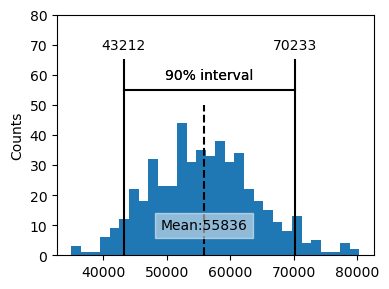

In [14]:
confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4,3))
ax.plot(confidence_interval, [55,55], color='black') # [x1, x2] , [y1,y2] plot (x1,y1), (x2,y2)

for x in confidence_interval:
    ax.plot([x,x], [0,65], color='black')
    ax.text(x, 70, f"{x:.0f}", horizontalalignment='center', verticalalignment='center')
    ax.text(sum(confidence_interval)/2, 60, s='90% interval', horizontalalignment='center',
            verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0,50], color='black', linestyle='--')
ax.text(meanIncome, 10, s=f"Mean:{meanIncome:.0f}", 
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0,80)
ax.set_ylabel('Counts')

plt.tight_layout()

In [15]:
confidence_interval

[43212.45, 70233.43999999999]

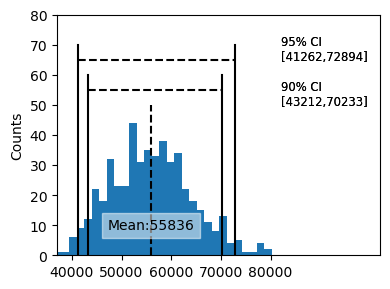

In [21]:
confidence_interval = list(results.quantile([0.05, 0.95])) # endpoints of 90% bootstrap confidence interval
ax = results.plot.hist(bins=30, figsize=(4,3), color='C1')
ax.plot(confidence_interval, [55,55], color='black', linestyle='--') # [x1, x2] , [y1,y2] plot (x1,y1), (x2,y2)

for x in confidence_interval:
    ax.plot([x,x], [0,60], color='black',)
    ax.text(82000, 50, f"90% CI\n[{confidence_interval[0]:.0f},{confidence_interval[1]:.0f}]", fontsize='small')
    

# demonstrate a different confidence interval
confidence_interval = list(results.quantile([0.025, 0.975])) # endpoints of 95% bootstrap confidence interval
ax = results.plot.hist(bins=30, figsize=(4,3))
ax.plot(confidence_interval, [65,65], color='black',linestyle='--') # [x1, x2] , [y1,y2] plot (x1,y1), (x2,y2)

for x in confidence_interval:
    ax.plot([x,x], [0,70], color='black' )
    ax.text(82000,65, f"95% CI\n[{confidence_interval[0]:.0f},{confidence_interval[1]:.0f}]", fontsize='small')
    
    

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0,50], color='black', linestyle='--')
ax.text(meanIncome, 10, s=f"Mean:{meanIncome:.0f}", 
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0,80)
ax.set_xlim(37000,102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

plt.tight_layout()

In the code above, we take a sample of 20 values (sampling by sliced permutation), calculate the mean and this is our known mean. Next we bootstrap (sampling with replacement). To get the 90% confidence interval we take (100-90)/2 = 5% from either end of the distribution, to get the endpoints which correspond to the 5th percentile and 95th percentile. To get the 95% confidence interval we take (100-95)/2=2.5 from either end of the distribution, to get the endpoints which correspond to the 2.5th percentile and the 97.5th percentile.

The bootstrap is a general tool that can be used to generate confidence intervals for most statistics, or model parameters. Of course, what we are really interested in when we have a sample is "What is the probability that the true value lies within a certain interval?". This is not really the question that a confidence interval answers, but it ends up being how most people interpret the answer. The probability question associated with a confidence interval starts out with the phrase "Given a sampling procedure and a population, what is the probability that ...". To go in the opposite direction, "Given a sample result, what is the probability that (something is true about the population)?" involves more complex calculations and deeper imponderables.

The percentage associated with the confidence interval is termed the level of confidence. The higher the level of confidence, the wider the interval. Also, the smaller the sample, the wider the interval (ie the greater the uncertainty). Both make sense: the more confident you want to be, and the less data you have, the wider you must make the confidence interval to be sufficiently assured of capturing the true value. For a data scientist, a confidence interval is a tool that can be used to get an idea of how variable a sample result might be. Data scientsts use this information to communicate the potential error in an estimate, and perhaps to learn whether a larger sample is needed.

<b><h3>Normal Distribution</h3></b>

The bell-shaped normal distribution is iconic in traditional statistics. The fact that distributions of sample statistics are often normally shaped has made it a powerful tool in the development of mathematical formulas that approximate those distributions. In a normal distribution, 68% of the data lies within one standard deviation of the mean, and 95% lies within two standard deviations.

It is a common misconception that the normal distribution is called that because most data follows a normal distribution - that is, it is the normal thing. Most of the variables used in a typical data science project - in fact most raw data as a whole- are not normally distributed. The utility of the normal distribution derives from the fact that many statistics are normally distributed in their sampling distribution. Even so, assumptions of normality are generally a last resort, used when empirical probability distributions, or bootstrap distributions, are not available.

Statistically speaking, an error is the difference between an actual value and a statistical estimate like the sample mean. For example, the standard deviation is based on the errors from the mean of the data. The development of the normal aka Gaussian distribution came from Carl Friedrich Gauss' study of the errors of astronomical measurements that were found to be normally distributed.

<b><h4>Standard Normal and QQ-Plots</h4></b>

A standard normal distribution is one in which the units on the x-axis are expressed in terms of standard deviations away from the mean. To compare data to a standard normal distribution, you subtract the mean and then divide by the standard deviation; this is also called normalization or standardization. Note that "standardization" in this sense is unrelated to database record standardization (conversion to a common format). The transformed value is termed a z-score, and the normal distribution is sometimes called the z-distribution.

The QQ-Plot is used to visually determine how close a sample is to a specified distribution - in this case, the normal distribution. The QQ-Plot orders the z-scores from low to high and plot each value's z-score on the y-axis; the x-axis is the corresponding quantile of a normal distribution for that value's rank. Since the data is normalized, the units correspond to the number of standard deviations from the mean. If the points roughly fall on the diagonal line, then the sample distribution can be considered close to normal. 

Converting data to z-scores (i.e, standardizing or normalizing the data) does not make the data normally distributed. It just puts the data on the same scale as the standard normal distribution, often for comparison purposes.

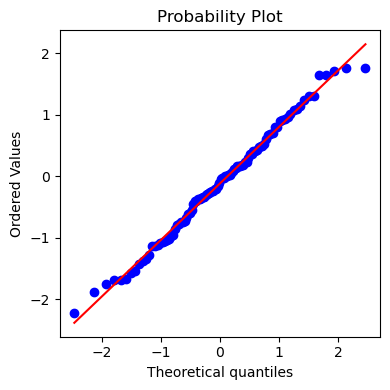

In [24]:
fig, ax = plt.subplots(figsize=(4,4))
norm_sample = stats.norm.rvs(size=100) # 100 values randomly generated from a normal distribution
stats.probplot(norm_sample, plot=ax)
plt.tight_layout()

<b><h3>Long-Tailed Distributions</h3></b>

Data is generally not normally distributed. While the normal distribution is often appropriate and useful with respect to the distribution of errors and sample statistics, it typically does not characterize the distribution of raw data. Sometimes, the distribution is highly skewed (asymmetric), such as income data; or the distribution can be discrete, as with binomial data. Both symmetric and asymmetric distributions may have long tails. The tails of a distributions correspond to extreme values (small and large). Long tails, and guarding against them, are widely recognized in practical work. Anomalous events, such as a stock market crash, are much more likely to occur than would be predicted by the normal distribution.

In the code below, we stabilize the variance via log transformation and stabilize the mean via first-order difference for Netflix daily stock returns. The points are far below the line for low values and far above the line for high values, indicating the data are not normally distributed. This means that we are much more likely to observe extreme values than would be expected if the data had a normal distribution. Also the points are close to the line for the data within one standard deviation of the mean, another common phenomenon known as "normal in the middle" but having much longer tails.


In [34]:
sp500_px = pd.read_csv('../data/sp500_data.csv.gz')

<Axes: >

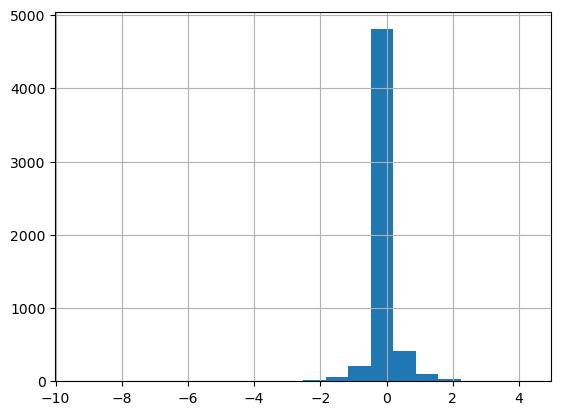

In [44]:
# daily stock return for Netflix
nflx = sp500_px.NFLX
nflx.hist(bins=20)

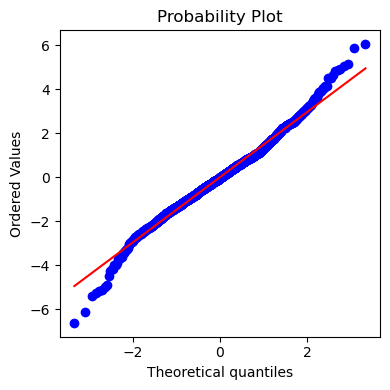

In [45]:
nflx_stdd = np.diff(np.log(nflx[nflx>0]))  # stabilize variance and mean
fig, ax = plt.subplots(figsize=(4,4))
stats.probplot(nflx_stdd, plot=ax)
plt.tight_layout()

In [46]:
nflx_stdd.std()

1.4883291099596283

In [47]:
nflx_stdd.mean()

0.0015561067366310268

<b><h3>Student's t-Distribution</h3></b>

The t-distribution is a normally shaped distribution, except that it is a bit thicker and longer on the tails. It is used extensively in depicting distributions of sample statistics. Distributions of sample means are typically shaped like a t-distribution, and there is a family of t-distributions that differ depending on how large the sample is. The larger the sample, the more normally shaped the t-distribution become. The t-distribution is often called "Student's t".
The author of Student's t distribution, was trying to answer the question "What is the sampling distribution of the mean of a sample, drawn from a larger population?.

A number of different statistics can be compared, after standardization, to the t-distribution, to estimate confidence intervals in light of sampling variation. Consider a sample of size n for which the sample mean $\bar x$ has been calculated. If $s$ is the sample standard deviation, a 90 % confidence interval around the mean is given by:

$\bar x$ $\pm t_{n-1} (0.05) · \frac{s}{\sqrt n}$

where $t_{n-1} (0.05)$ is the value of the t-statistic with (n-1) degrees of freedom, that "chops off" 5% of the t-distribution at either end. The t-distribution has been used as a reference for the distribution of a sample mean, the difference between two sample means, regression parameters, and other statistics. Lacking computers, statisticians in the 18th century relied on mathematics and functions such as the t-distribution to approximate sampling distributions.

The t-distribution's accuracy in depicting the behavior of a sample statistic requires that the distribution of that statistic for that sample be shaped like a normal distribution. It turns out that sample statistics are oten normally distributed, even when the underlying population data is not.

<b><h3>Binomial Distribution</h3></b>

Yes/no (binomial) outcomes lie at the heart of analytics since they are often the culmination of a decision or other process; buy/don't buy, click/don't click, survive/die, and so on. Central to understanding the binomial distribution is the idea of a set of trials, each trial having two possible outcomes with definite probabilities.

For example, flipping a coin 10 times is a binomial experiment with 10 trials, each trial having two possible outcomes (heads or tails). Such yes/no or 0/1 outcomes are termed binary outcomes, and they need not have 50/50 probabilities. Any probabilities that sum to 1.0 are possible. It is conventional in statistics to term the "1" outcome as the success outcome; it is also common practice to assign "1" to the more rare outcome. Use of the term success does not imply that the outcome is desirable or beneficial, but it does tend to indicate the outcome of interest. For example, loan defaults or fraudaulent transactions are relatively uncommon events that we may be interested in predicting, so they are termed "1s" or "successes".

The binomial distribution is the frequency distribution of the number of success (x) in a given number of trials (n) with a specified probability (p) of success in each trial. There is a family of binomial distributions, depending on the values of n and p. The binomial distribution would answer a question like, If the probability of a click converting to a sale is 0.02, what is the probabilty of observing 0 sales in 200 clicks?.

The scipy.stats module implements a large variety of statistical distributions. For the binomial distribution, use the functions stats.binom.pmf() and stats.binom.cdf().

The mean of a binomial distribution is $n* p$,; you can also think of this as the expected number of successes in n trials, for success probability = p. The variance is $n*p(1-p)$. With a large enough number of trials (particularly when p is close to 0.50), the binomial distribution is virtually indistinguishable from the normal distribution. In fact, calculating binomial probabilities with large sample sizes is computationally demanding, and most statistical procedures use the normal distribution , with mean and variance, as an approximation.

In [50]:
stats.binom.pmf(2, n=5, p=0.1) # 2 success in 5 trials, probability of success is 0.1

0.07289999999999992

In [51]:
stats.binom.cdf(2,n=5,p=0.1)

0.99144

<b><h3>Chi-Square Distribution</h3></b>

An important idea in statistics in departure from expectation, especially with respect to category counts. Expectation is defined loosely as "nothing unusual or of note in the data " (eg no correlation between variables or predictable patterns). This is also termed the "null hypothesis" or "null model". For example, you might want to test whether one variable (say a row variable representing gender) is independent of another (say, a column variable representing "was promoted in job"), and you have counts of number of each in the cells of the data table. The statistic that measures the extent to which results depart from the null expectation of independence is the chi-square statistic. It is the difference between the observed and expected values, divided by the square root of the expected value, squared and summed across all categories. This process standardizes the statistic so it can be compared to a reference distribution. A more general way of putting this is to note that the chi-square statistic is a measure of the extent to which a set of observed values "fits" a specified distribution (a "gooness-of-fit" test). It is useful for determining whether multiple streatments (an "A/B/C ... test") differ from one another in their effects.

The chi-square distribution is the distribution of this statistic under repeated resampled draws from the null model. A low chi-square value for a set of counts indicates that they closely follow the expected distribution. A high chi-square value indicates that they differ markedly from what is expected. There are a variety of chi-square distributions associated with different degrees of freedom.

<b><h3>F-Distribution</h3></b>

A common procedure in scientific experimentation is to test multiple treatments across groups - say, different fertilizers on different blocks of a field. This is similar to A/B/C test, except we are dealing with measured continuous values rather than counts. In this case, we are interested in extent to which differences among group means are greater than we might expect under normal random variation. The F-statistic measures this and is the ratio of the variability among the groupmeans to the variability within each group (also called residual variability). This comparison is termed an analysis of variance. The distribution of the F-statistic is the frequency distribution of all the values that would be produced by randomly permuting data in which all the group means are equal (ie a null model). There are a variety of F-distributions associated with different degrees of freedom (eg numbers of groups). The calculation of F is illustrated in the section on ANOVA. The F-statistic is also used in linear regression to compare the variation accounted for by the regression model to the overall variation in the data. F-statistics are produced automatically by Python as part of regression and ANOVA routines.

<b><h3>Poisson and Related Distributions</h3></b>

Many processes produce events randomly at a given overall rate - visitors arriving at a website, or cars arriving at a toll plaza (events spread over time); imperfections in a square meter of fabric, or typos per 100 lines of code (events spread over space).

<b><h4>Poisson Distributions</h4></b>

From prior aggregate data (for example, number of flu infections per year), we can estimate the average number of events per unit of time or space (eg infections per day, or per census unit). We might also want to know how different this might be from one unit of time / space to another. The Poisson distribution tells us the distribution of events per unit of time or space when we sample many such units. It is useful when addressing queuing questions such as "How much capacity do we need to be 95% sure of fully processing the internet traffic that arrives on a server in any five-second period?"

The key parameter in a Poisson distribution is $\lambda$, or lambda. This is the mean number of events that occurs in a specified interval of time or space. The variance for a Poisson distribution is also $\lambda$. A common technique is to generate random numbers from a Poisson distribution as part of a queuing simulation. In scipy we can do this with scipy.stats.poisson.rvs.

<Axes: ylabel='Frequency'>

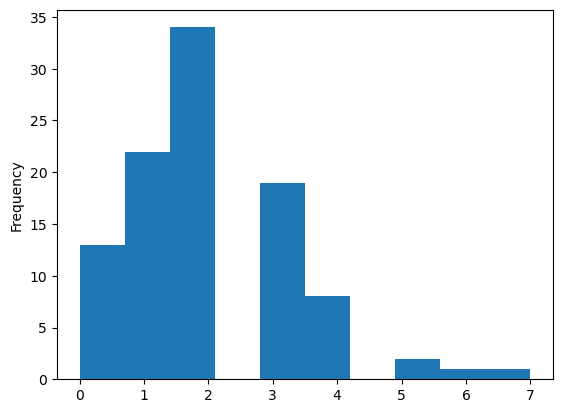

In [69]:
vals = stats.poisson.rvs(2,size=100) # 100 random numbers from a Poissson distribution with 𝜆 = 2.
pd.Series(vals).plot.hist()

The code above will generate 100 random numbers from a Poisson distribution with $\lambda$ = 2 . For example, if incoming customer service calls average two per minute, this code will simulate 100 minutes, returning the number of calls in each of those 100 minutes

<b><h4>Exponential Distribution</h4></b>

Using the same parameter $\lambda$ that we used in the Poisson distribution, we can also model the distribution of the time between events: time between visits to a website or between cars arriving at a toll plaza. It is also used in engineering to model time to failure, and in process management to model, for example, the time required per service call. In the function stats.expon.rsvs(), we can model exponential distributions.

<Axes: ylabel='Frequency'>

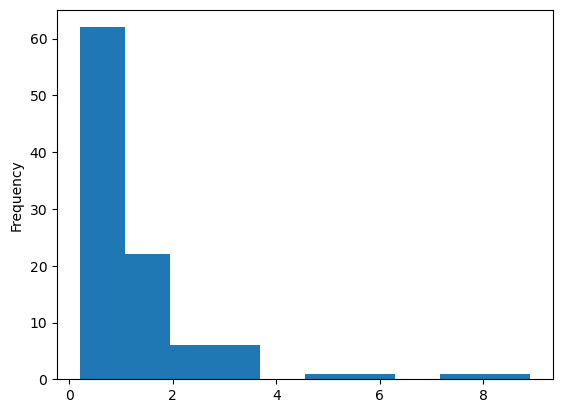

In [67]:
vals = stats.expon.rvs(0.2, size=100)
pd.Series(vals).plot.hist()

This code will generate 100 random numbers from an exponential distribution where the mean number of events per time period is 0.2. So you could use it to simulate 100 intervals, in minutes, between service calls, where the average rate of incoming calls is 0.2 per minute.

A key assumption in any simulation study for either the Poisson or exponential distribution is that the rate $\lambda$ remains constant over the period being considered. This is rarely reasonable in a global sense; for example, traffic on roads or data networks varies by time of day and day of week. However, the time periods, or areas of space can usually be divided into segments that are sufficiently homogenous so that analysis or simulation within those periods is valid.

<b><h4>Estimating the Failure Rate</h4></b>

In many applications, the event rate, $\lambda$, is known or can be estimated from prior data. However, for rare events, this is not necessarily so. Aircraft engine failure, for example, is sufficiently rare (thankfully) that, for a given engine type, there may be little data on which to base an estimate of time between failures. With no data at all, there is little basis on which to estimate an event rate. However, you can make some guesses: if no event have been seen after 20 hours, you can be pretty sure that the rate is not 1 per hour. Via simulation, or direct calculation of probabilities, you can assess different hypothetical event rates and estimate threshold values below which the rate is very unlikely to fall. If there is some data but not enough to provide a precise, reliable estimate of the rate, a goodness-of-fit test ("Chi-Square Test") can be applied to various rates to determine how well they fit the observed data.

<b><h4>Weibull Distribution</h4></b>

In many cases, the event rate does not remain constant over time. If the period over which it changes is much longer than the typical interval between events, there is no problem; you just subdivide the analysis into the segments where rates are relatively constant. If however, the event rate changes over the time of the interval, the exponential (or Poisson) distributions are no longer useful. This is likely to be the case in mechanical failure - the risk of failure increases as time goes by. The Weibull distribution is an extension of the exponential distribution in which the event rate is allowed to change, as specified by a shape parameter, $\beta$. If $\beta$ > 1, the probability of an event increases over time; if $\beta$ < 1, the probability decreases. Because the Weibull distribution is used with time-to-failure analysis instead of event rate, the second parameter is expressed in terms of characteristic life, rather than in terms of the rate of events per interval. The symbol used is $\eta$, the Greek letter eta. It is also called the scale parameter.

With the Weibull, the estimation task now includes estimation of both parameters, $\beta$ and $\eta$. Software is used to model the data and yield an estimate of the best-fitting Weibull distribution. To generate random numbers from a Weibull distribution we provide three arguments: n (the quantity of numbers to be generated), shape, and scale, to the function scipy.stats.weibull_min.rvs().

<Axes: ylabel='Frequency'>

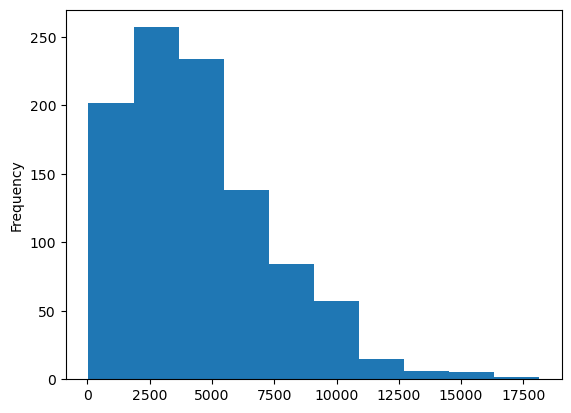

In [72]:
# Generate 100 random numbers (lifetimes) from Weibull dist of shape 1.5 and characteristic life 5000
vals =stats.weibull_min.rvs(1.5, scale=5000, size=1000)
pd.Series(vals).plot.hist()